#### Importing the Relevant Libraries

In [123]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [178]:
df = pd.read_csv(r"C:\Users\hp\Documents\Turbham Tech\merged_diabetes_dataset.csv")
df.head()

,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Diabetes_binary
0,2.0,70.0,9.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,60.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,2.0,50.0,12.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,2.0,42.0,11.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,2.0,26.0,13.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [180]:
df.shape

(70843, 13)

In [125]:
## Display the data types of the columns
df.dtypes

Sex                     float64
Age                     float64
BMI                     float64
HighBP                  float64
HighChol                float64
CholCheck               float64
Smoker                  float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
HeartDiseaseorAttack    float64
Diabetes_binary         float64
dtype: object

### Univariate Analysis

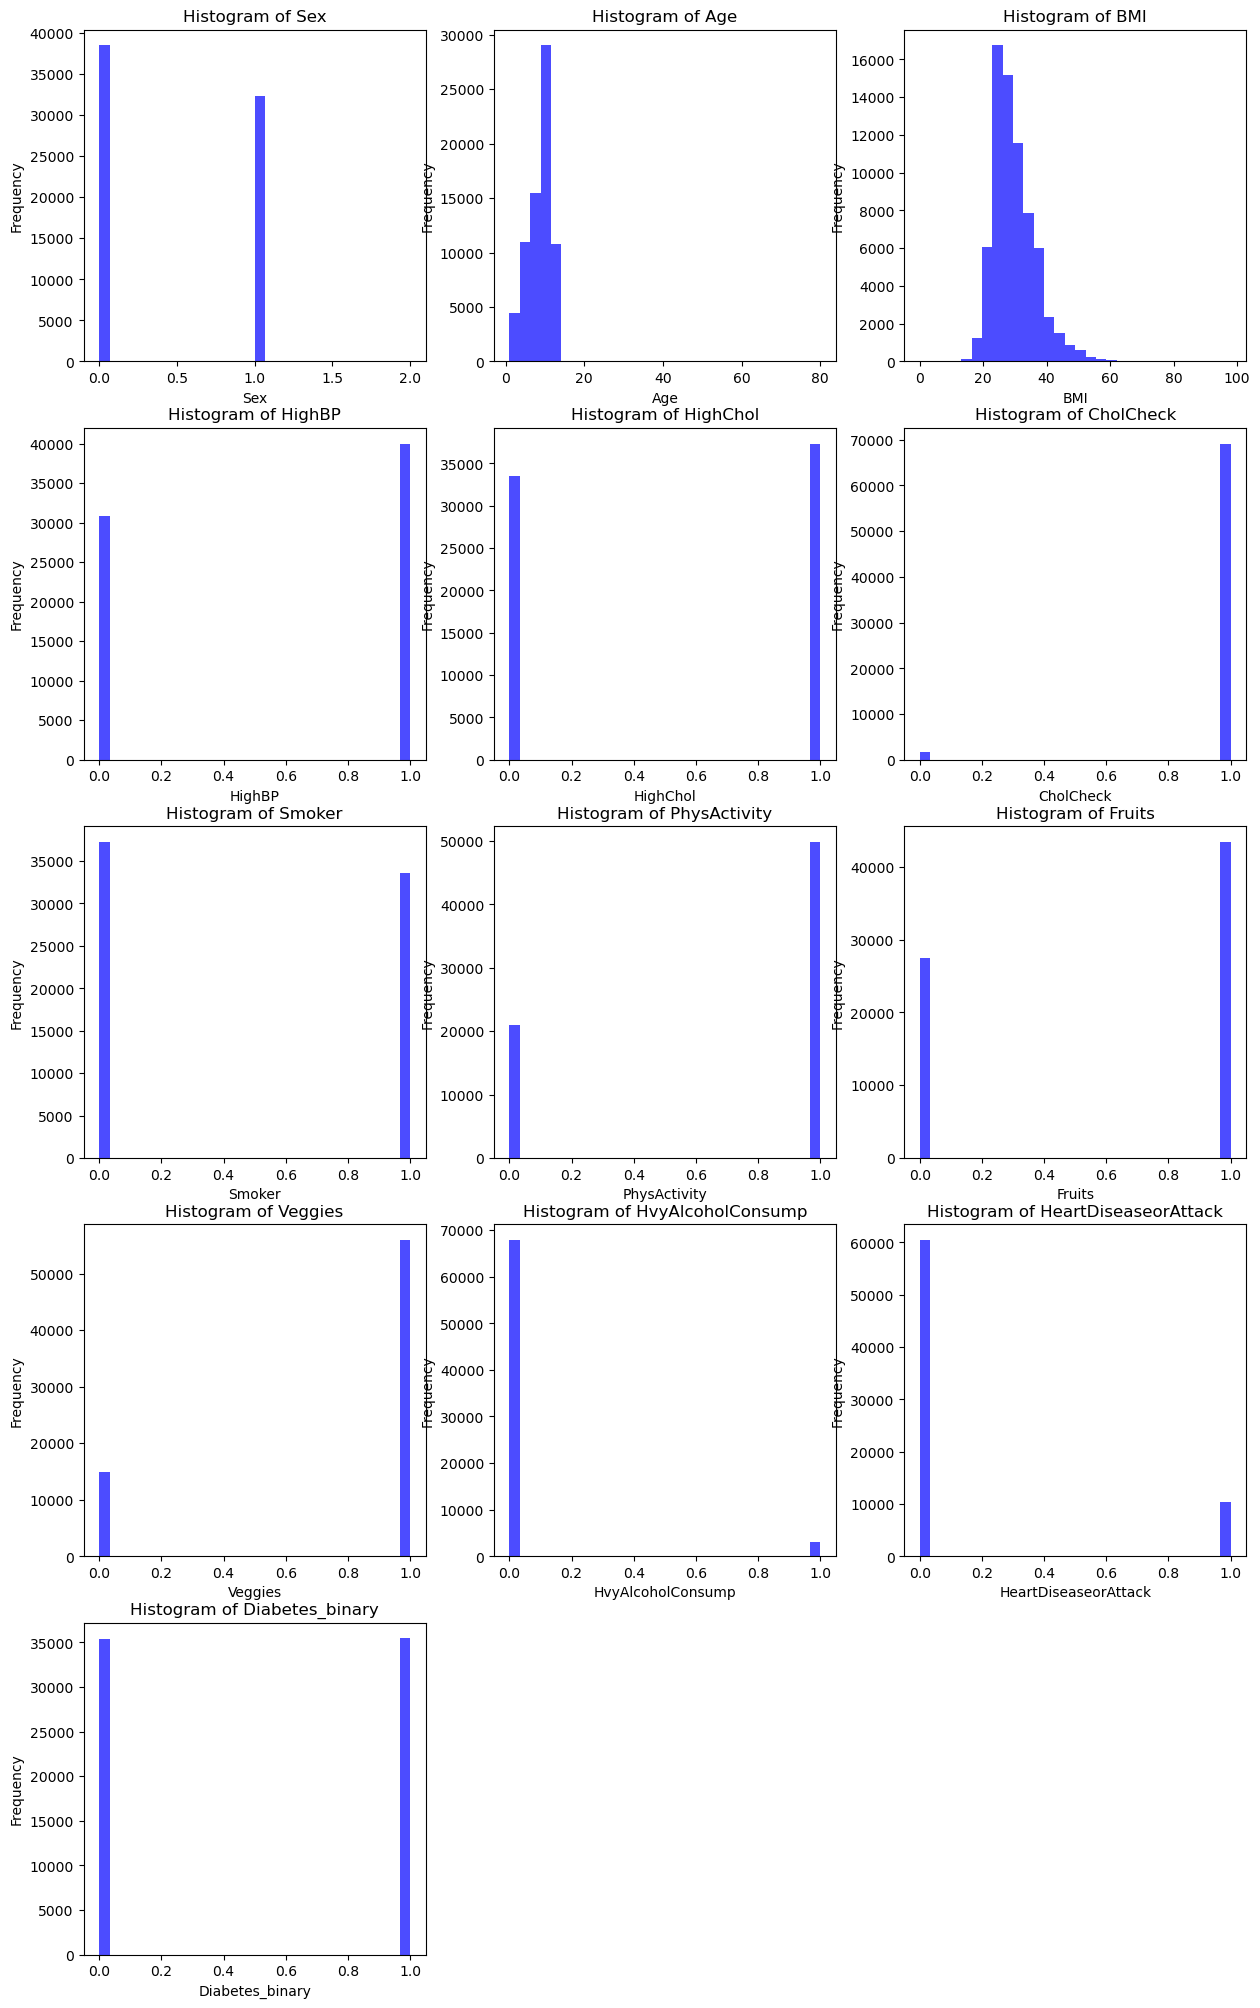

In [182]:
num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')



The histograms provide insights into the distribution of various health and lifestyle attributes within the dataset. The data appears to include information on sex, age, body mass index, blood pressure, cholesterol levels, fruit and vegetable consumption, smoking behavior, alcohol consumption, and the presence or absence of heart disease and diabetes. The distinct separation between categories for several attributes, such as high blood pressure and high cholesterol, suggests that the dataset may be focused on understanding the relationships between these factors and their impact on health outcomes.

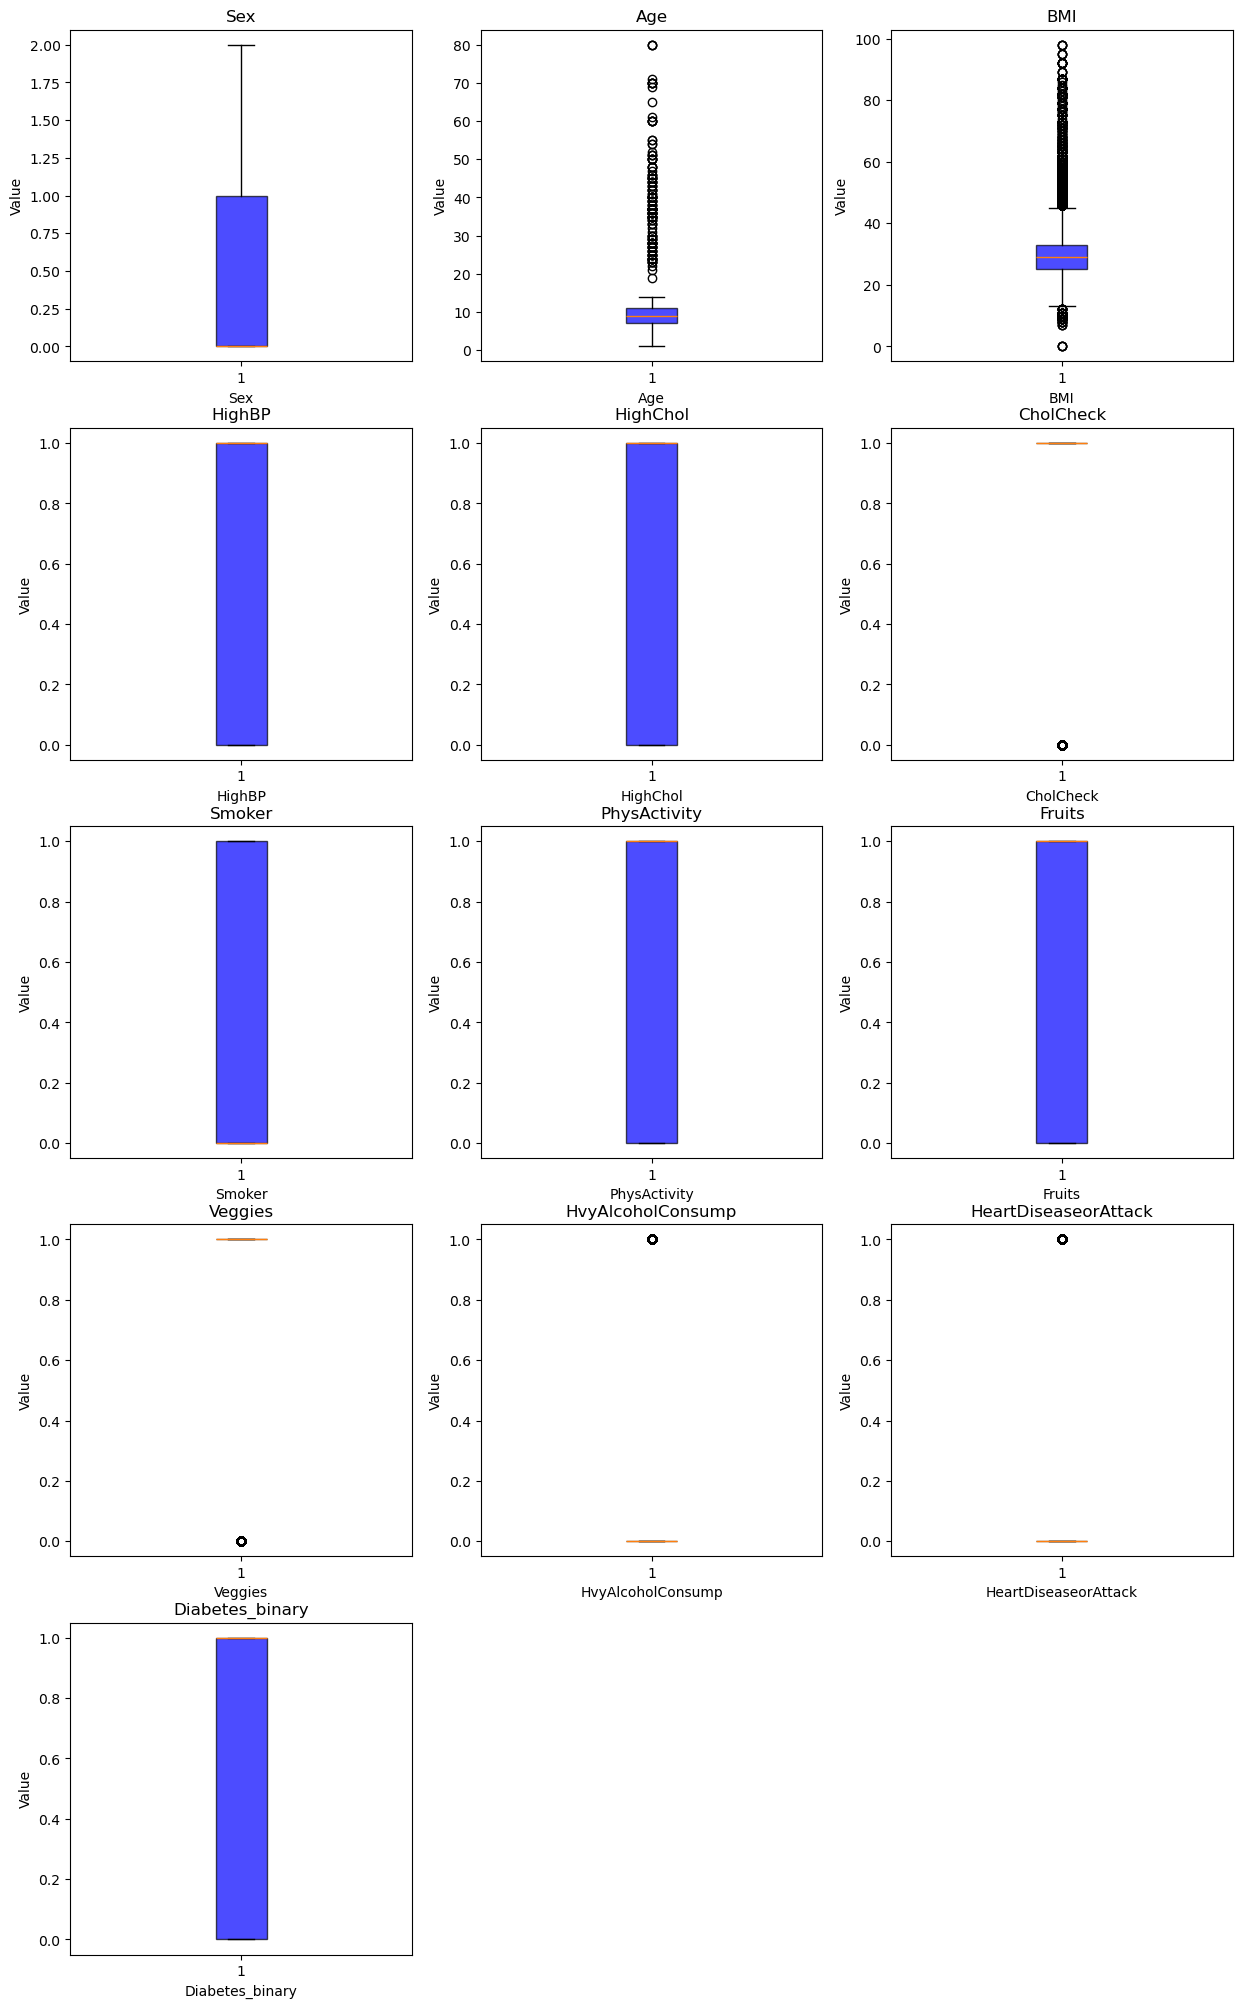

In [128]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number').columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot box plots for each numerical column
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.7))
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')


The histograms provide a comprehensive overview of the health and lifestyle characteristics within the dataset. The data appears to have a balanced sex distribution and a focus on middle-aged individuals. Key insights include the BMI distribution, the presence or absence of high blood pressure and cholesterol, and the consumption levels of fruits, vegetables, and alcohol. The dataset also includes information on smoking behavior, heart disease/attack, and diabetes. This suggests the data may be used to explore the relationships between these health and lifestyle factors and their impact on overall well-being.

In [130]:
## Converting the target to a category score
df['Diabetes_binary'] = df['Diabetes_binary'].apply(lambda x: 'Not Diabetes' if x == 0 else 'Diabetes')

print(df)


       Sex   Age   BMI  HighBP  HighChol  CholCheck  Smoker  PhysActivity  \
0      2.0  70.0   9.0     1.0       1.0        1.0     0.0           1.0   
1      2.0  60.0  11.0     1.0       1.0        1.0     0.0           1.0   
2      2.0  50.0  12.0     1.0       1.0        1.0     0.0           1.0   
3      2.0  42.0  11.0     1.0       1.0        1.0     0.0           1.0   
4      2.0  26.0  13.0     1.0       1.0        1.0     0.0           1.0   
...    ...   ...   ...     ...       ...        ...     ...           ...   
70838  0.0   6.0  37.0     0.0       1.0        1.0     0.0           0.0   
70839  1.0  10.0  29.0     0.0       1.0        1.0     1.0           0.0   
70840  0.0  13.0  25.0     1.0       1.0        1.0     0.0           0.0   
70841  0.0  11.0  18.0     1.0       1.0        1.0     0.0           0.0   
70842  0.0   9.0  25.0     1.0       1.0        1.0     0.0           1.0   

       Fruits  Veggies  HvyAlcoholConsump  HeartDiseaseorAttack  \
0       

In [131]:
# Creating Bar Chart for the 
df.select_dtypes(include=["object", "category"]).columns.tolist()

['Diabetes_binary']

In [132]:
df.Diabetes_binary.value_counts()

Diabetes_binary
Diabetes        35427
Not Diabetes    35416
Name: count, dtype: int64

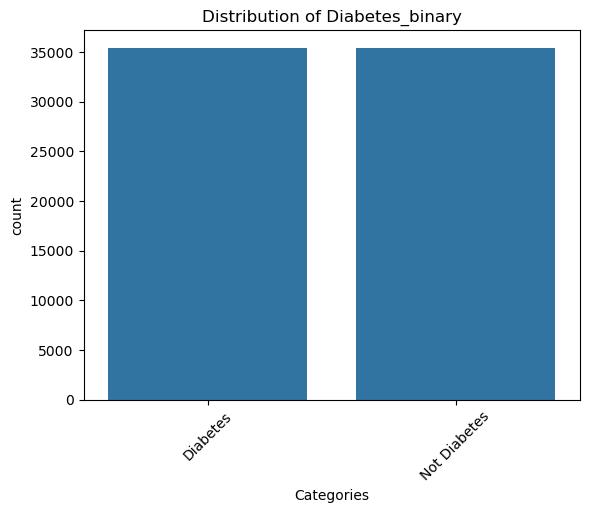

In [133]:
sns.countplot(data=df, x="Diabetes_binary")
plt.title("Distribution of Diabetes_binary")
plt.xlabel("Categories")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

<p>The chart shows the distribution of a binary diabetes variable in the dataset. The majority of the data points are classified as "Diabetes", indicating a higher prevalence of diabetes in the sample. The "Not Diabetes" category has a significantly lower count, suggesting that the dataset is focused on individuals with diabetes or at risk of developing the condition. This information could be useful for further analysis and understanding the characteristics of the diabetic population within the given data.</p>

In [135]:
# Computing and Visualizing the Descriptive Statistics
df.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
Sex,70843,0,0,0,0,0,1,2
Age,70843,8,3,1,7,9,11,80
BMI,70843,29,7,0,25,29,33,98
HighBP,70843,0,0,0,0,1,1,1
HighChol,70843,0,0,0,0,1,1,1
CholCheck,70843,0,0,0,1,1,1,1
Smoker,70843,0,0,0,0,0,1,1
PhysActivity,70843,0,0,0,0,1,1,1
Fruits,70843,0,0,0,0,1,1,1
Veggies,70843,0,0,0,1,1,1,1


#### Correlation Heatmap

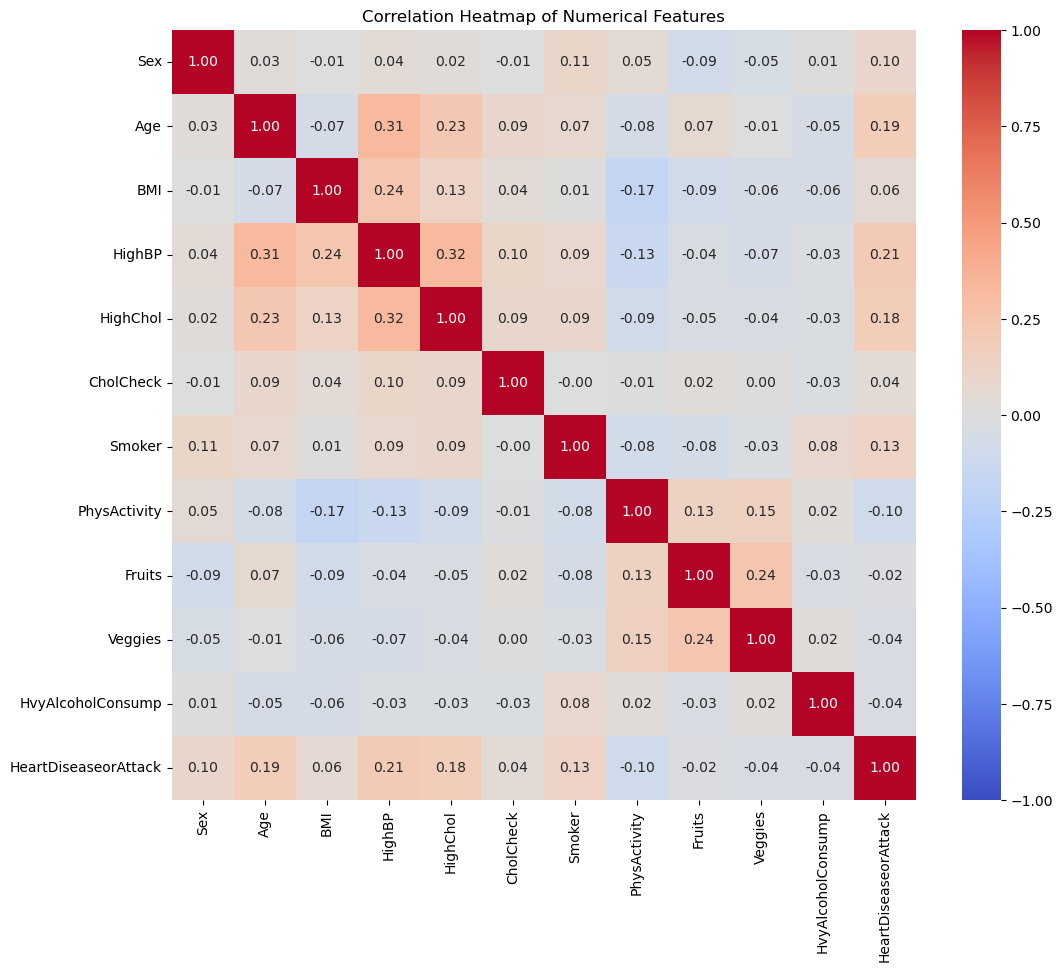

In [137]:
# Select only numerical columns for correlation analysis
num_cols = df.select_dtypes(include='number')

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<p>The correlation heatmap shows how different factors in the data are related to each other:</p>

<ul>
  <li>Factors like sex, body weight, blood pressure, and cholesterol levels are closely connected. When one of these goes up, the others tend to go up as well.</li>
  <li>Age, physical activity, and eating fruits and vegetables are moderately connected. As people get older or become more active, they may also eat more fruits and veggies.</li>
  <li>Physical activity has the opposite relationship with factors like body weight, cholesterol, alcohol use, and heart disease. When physical activity goes up, these other factors tend to go down, and vice versa.</li>
  <li>Smoking doesn't seem to be strongly connected to most of the other factors in the data. It's more independent of the other characteristics.</li>
</ul>

<p>These insights can help us understand the relationships between different health-related factors and guide further analysis and potential interventions to improve people's health.</p>
</ol>

#### Bivariate Analysis

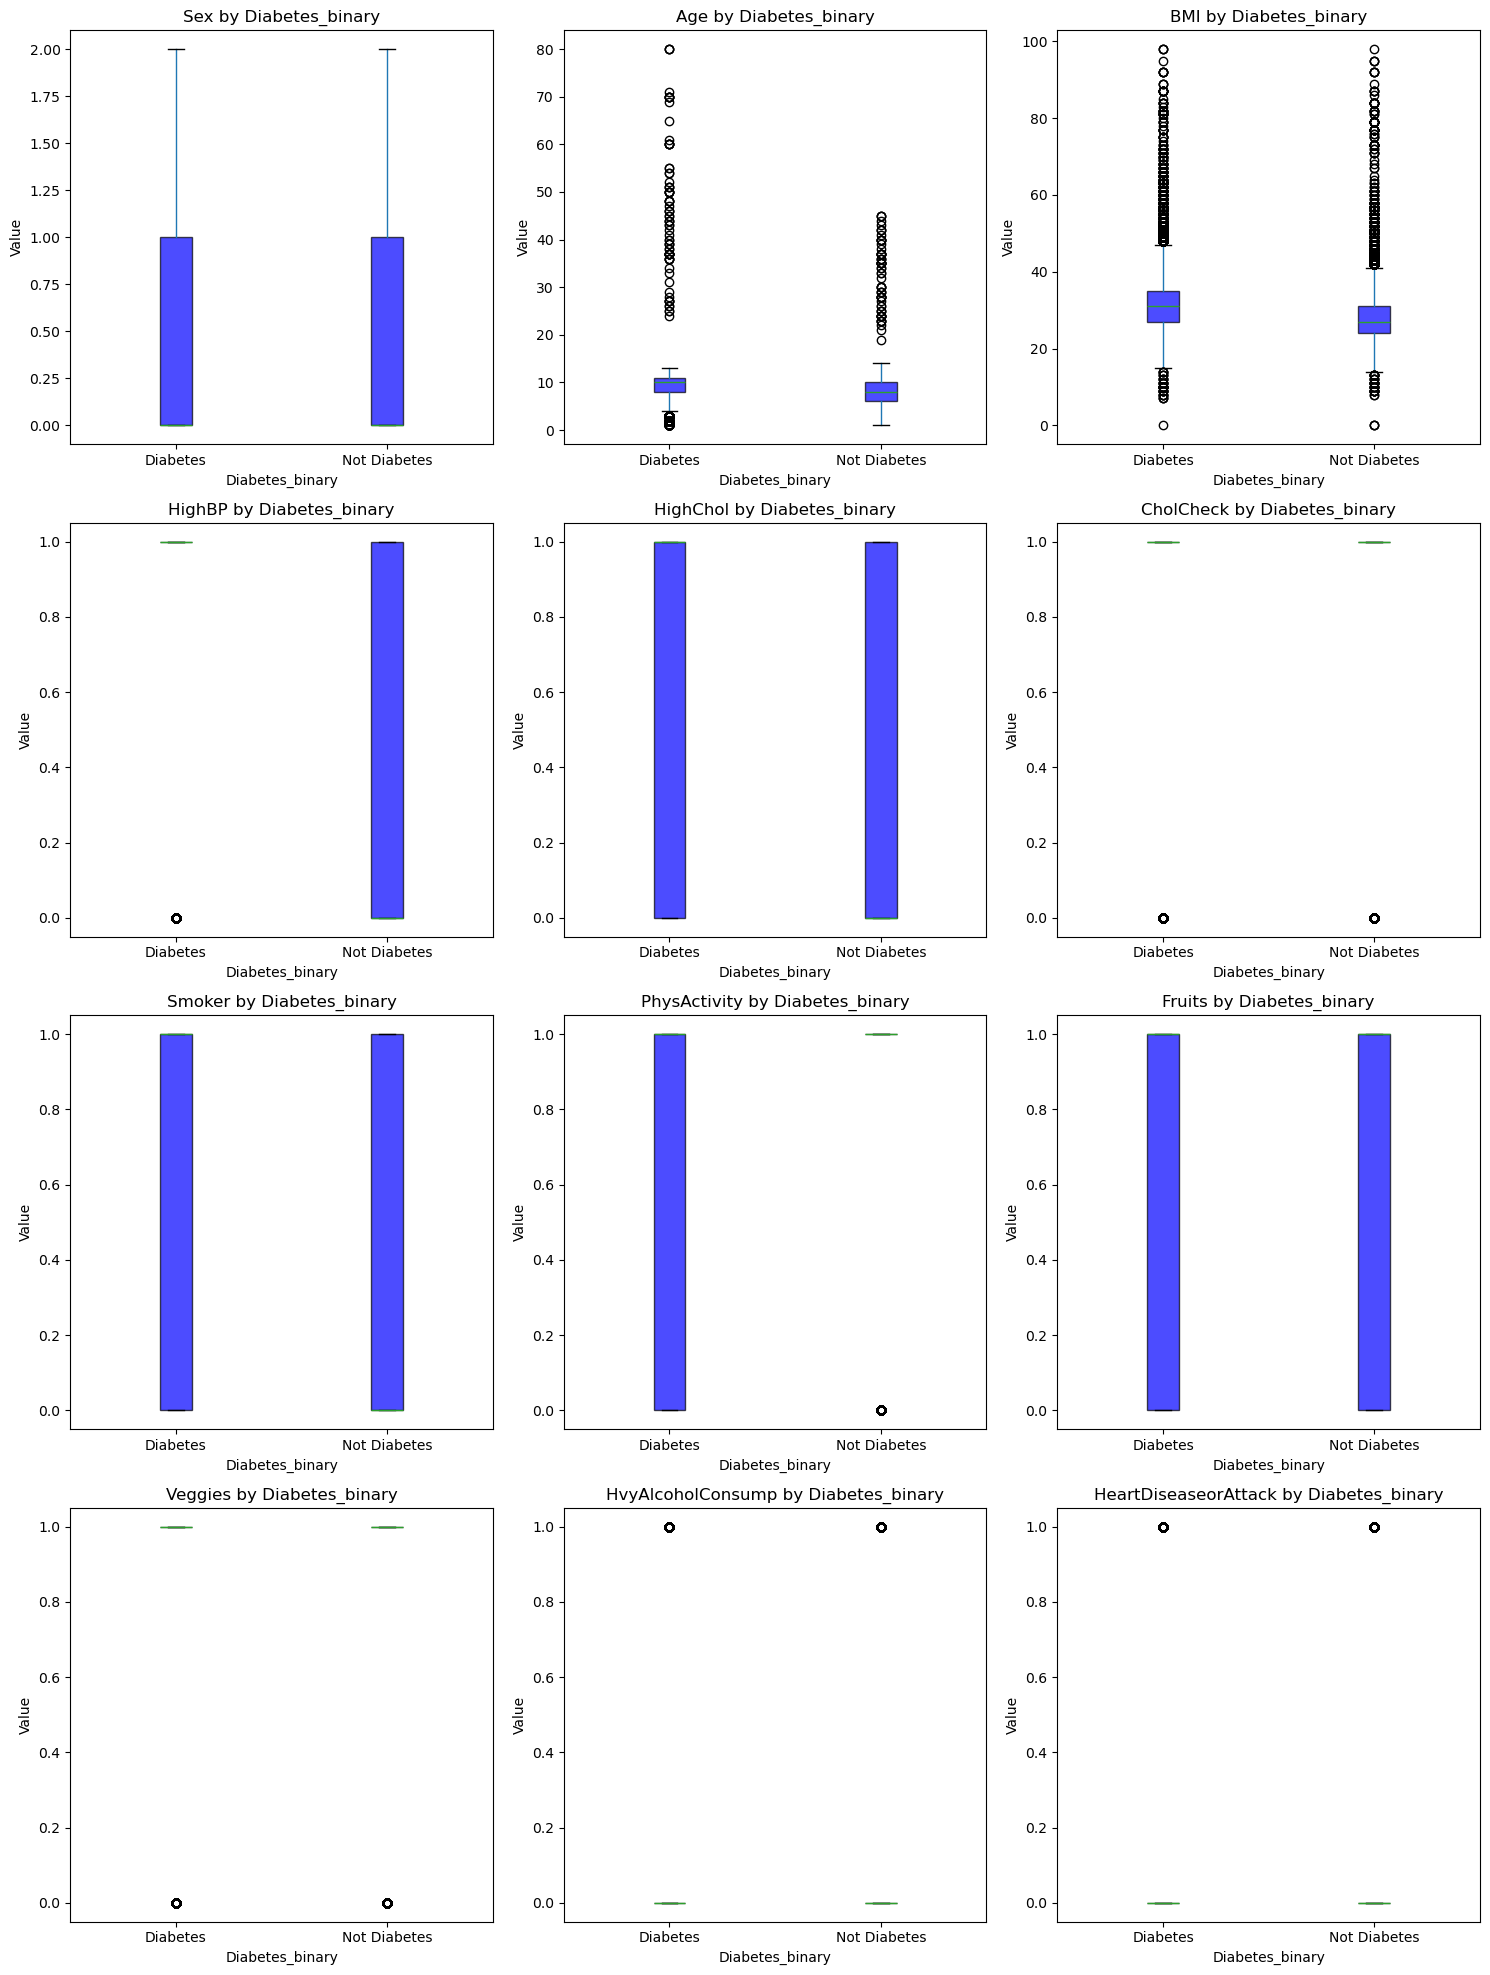

In [140]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Categorical variable for grouping
categorical_var = 'Diabetes_binary'

# Ensure the categorical variable is in the DataFrame
if categorical_var in df.columns:
    n_cols = 3  # Number of columns in the subplot grid
    n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Calculate number of rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Plot box plots for each numerical column grouped by the categorical variable
    for i, col in enumerate(num_cols):
        df.boxplot(column=col, by=categorical_var, ax=axes[i], grid=False, patch_artist=True,
                   boxprops=dict(facecolor='blue', alpha=0.7))
        axes[i].set_title(f'{col} by {categorical_var}')
        axes[i].set_xlabel(categorical_var)
        axes[i].set_ylabel('Value')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle('')  # Suppress the overall title
    plt.tight_layout()
    plt.show()
else:
    print(f"The categorical variable '{categorical_var}' is not in the dataset.")


<p>The charts provide several key insights:</p>

<ul>
  <li>Diabetes is more prevalent in males compared to females.</li>
  <li>Older individuals tend to have higher BMI, with diabetic individuals having significantly higher BMI on average.</li>
  <li>Diabetic individuals are more likely to have high blood pressure, high cholesterol, and heart disease/attacks compared to non-diabetics.</li>
  <li>Physical activity levels are lower among diabetic individuals, while fruit and vegetable consumption is also lower in this group.</li>
  <li>Smoking and heavy alcohol consumption do not show a strong association with diabetes status.</li>
  <li>These insights highlight the interconnected nature of diabetes with various health factors and lifestyle behaviors, which can inform prevention and management strategies.</li>
</ul>

In [164]:
# Select all numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix for the selected numerical columns
corr_matrix = df[numerical_columns].corr()

# Display the correlation matrix
corr_matrix


,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack
Sex,1.000000,0.025195,-0.005776,0.042654,0.019448,-0.007581,0.109270,0.053009,-0.086387,-0.051133,0.013603,0.096712
Age,0.025195,1.000000,-0.066768,0.314372,0.229980,0.092531,0.073189,-0.075239,0.069716,-0.006100,-0.054928,0.186287
BMI,-0.005776,-0.066768,1.000000,0.236864,0.127496,0.044921,0.014590,-0.172207,-0.086664,-0.057944,-0.057277,0.061430
HighBP,0.042654,0.314372,0.236864,1.000000,0.317729,0.103494,0.085500,-0.134711,-0.039299,-0.065580,-0.027402,0.209757
HighChol,0.019448,0.229980,0.127496,0.317729,1.000000,0.086219,0.091296,-0.089012,-0.045696,-0.041737,-0.025845,0.180137
CholCheck,-0.007581,0.092531,0.044921,0.103494,0.086219,1.000000,-0.004649,-0.008025,0.017642,0.000525,-0.027216,0.043347
Smoker,0.109270,0.073189,0.014590,0.085500,0.091296,-0.004649,1.000000,-0.081027,-0.076301,-0.030937,0.078184,0.125118
PhysActivity,0.053009,-0.075239,-0.172207,-0.134711,-0.089012,-0.008025,-0.081027,1.000000,0.134765,0.149929,0.018809,-0.098738
Fruits,-0.086387,0.069716,-0.086664,-0.039299,-0.045696,0.017642,-0.076301,0.134765,1.000000,0.239254,-0.033580,-0.020126
Veggies,-0.051133,-0.006100,-0.057944,-0.065580,-0.041737,0.000525,-0.030937,0.149929,0.239254,1.000000,0.021850,-0.036757


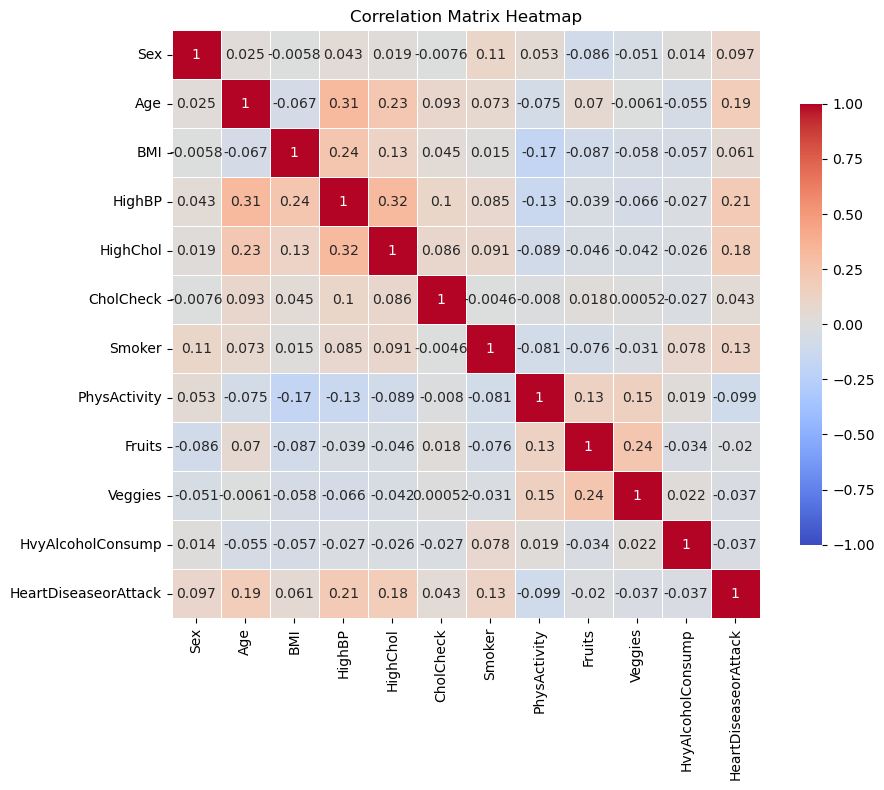

In [168]:
# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

#### Key Insight

The heatmap shows how different health factors are related to each other. For example, it shows that people who have high blood pressure are also more likely to have high cholesterol and a higher risk of heart disease or heart attacks. These three health issues seem to be very closely connected.

On the other hand, things like smoking, exercise levels, and how much fruits and vegetables people eat don't seem to be as strongly linked to those heart-related problems. They have a weaker relationship.

What this tells us is that the most important factors driving conditions like high blood pressure, high cholesterol, and heart disease are the ones that are most closely tied together. Tackling those core, interconnected issues is going to be crucial for improving people's overall heart health and reducing their risk of serious problems. The lifestyle factors matter, but addressing the underlying connections between the key medical indicators is likely to have the biggest impact.

#### Multivariate Analysis

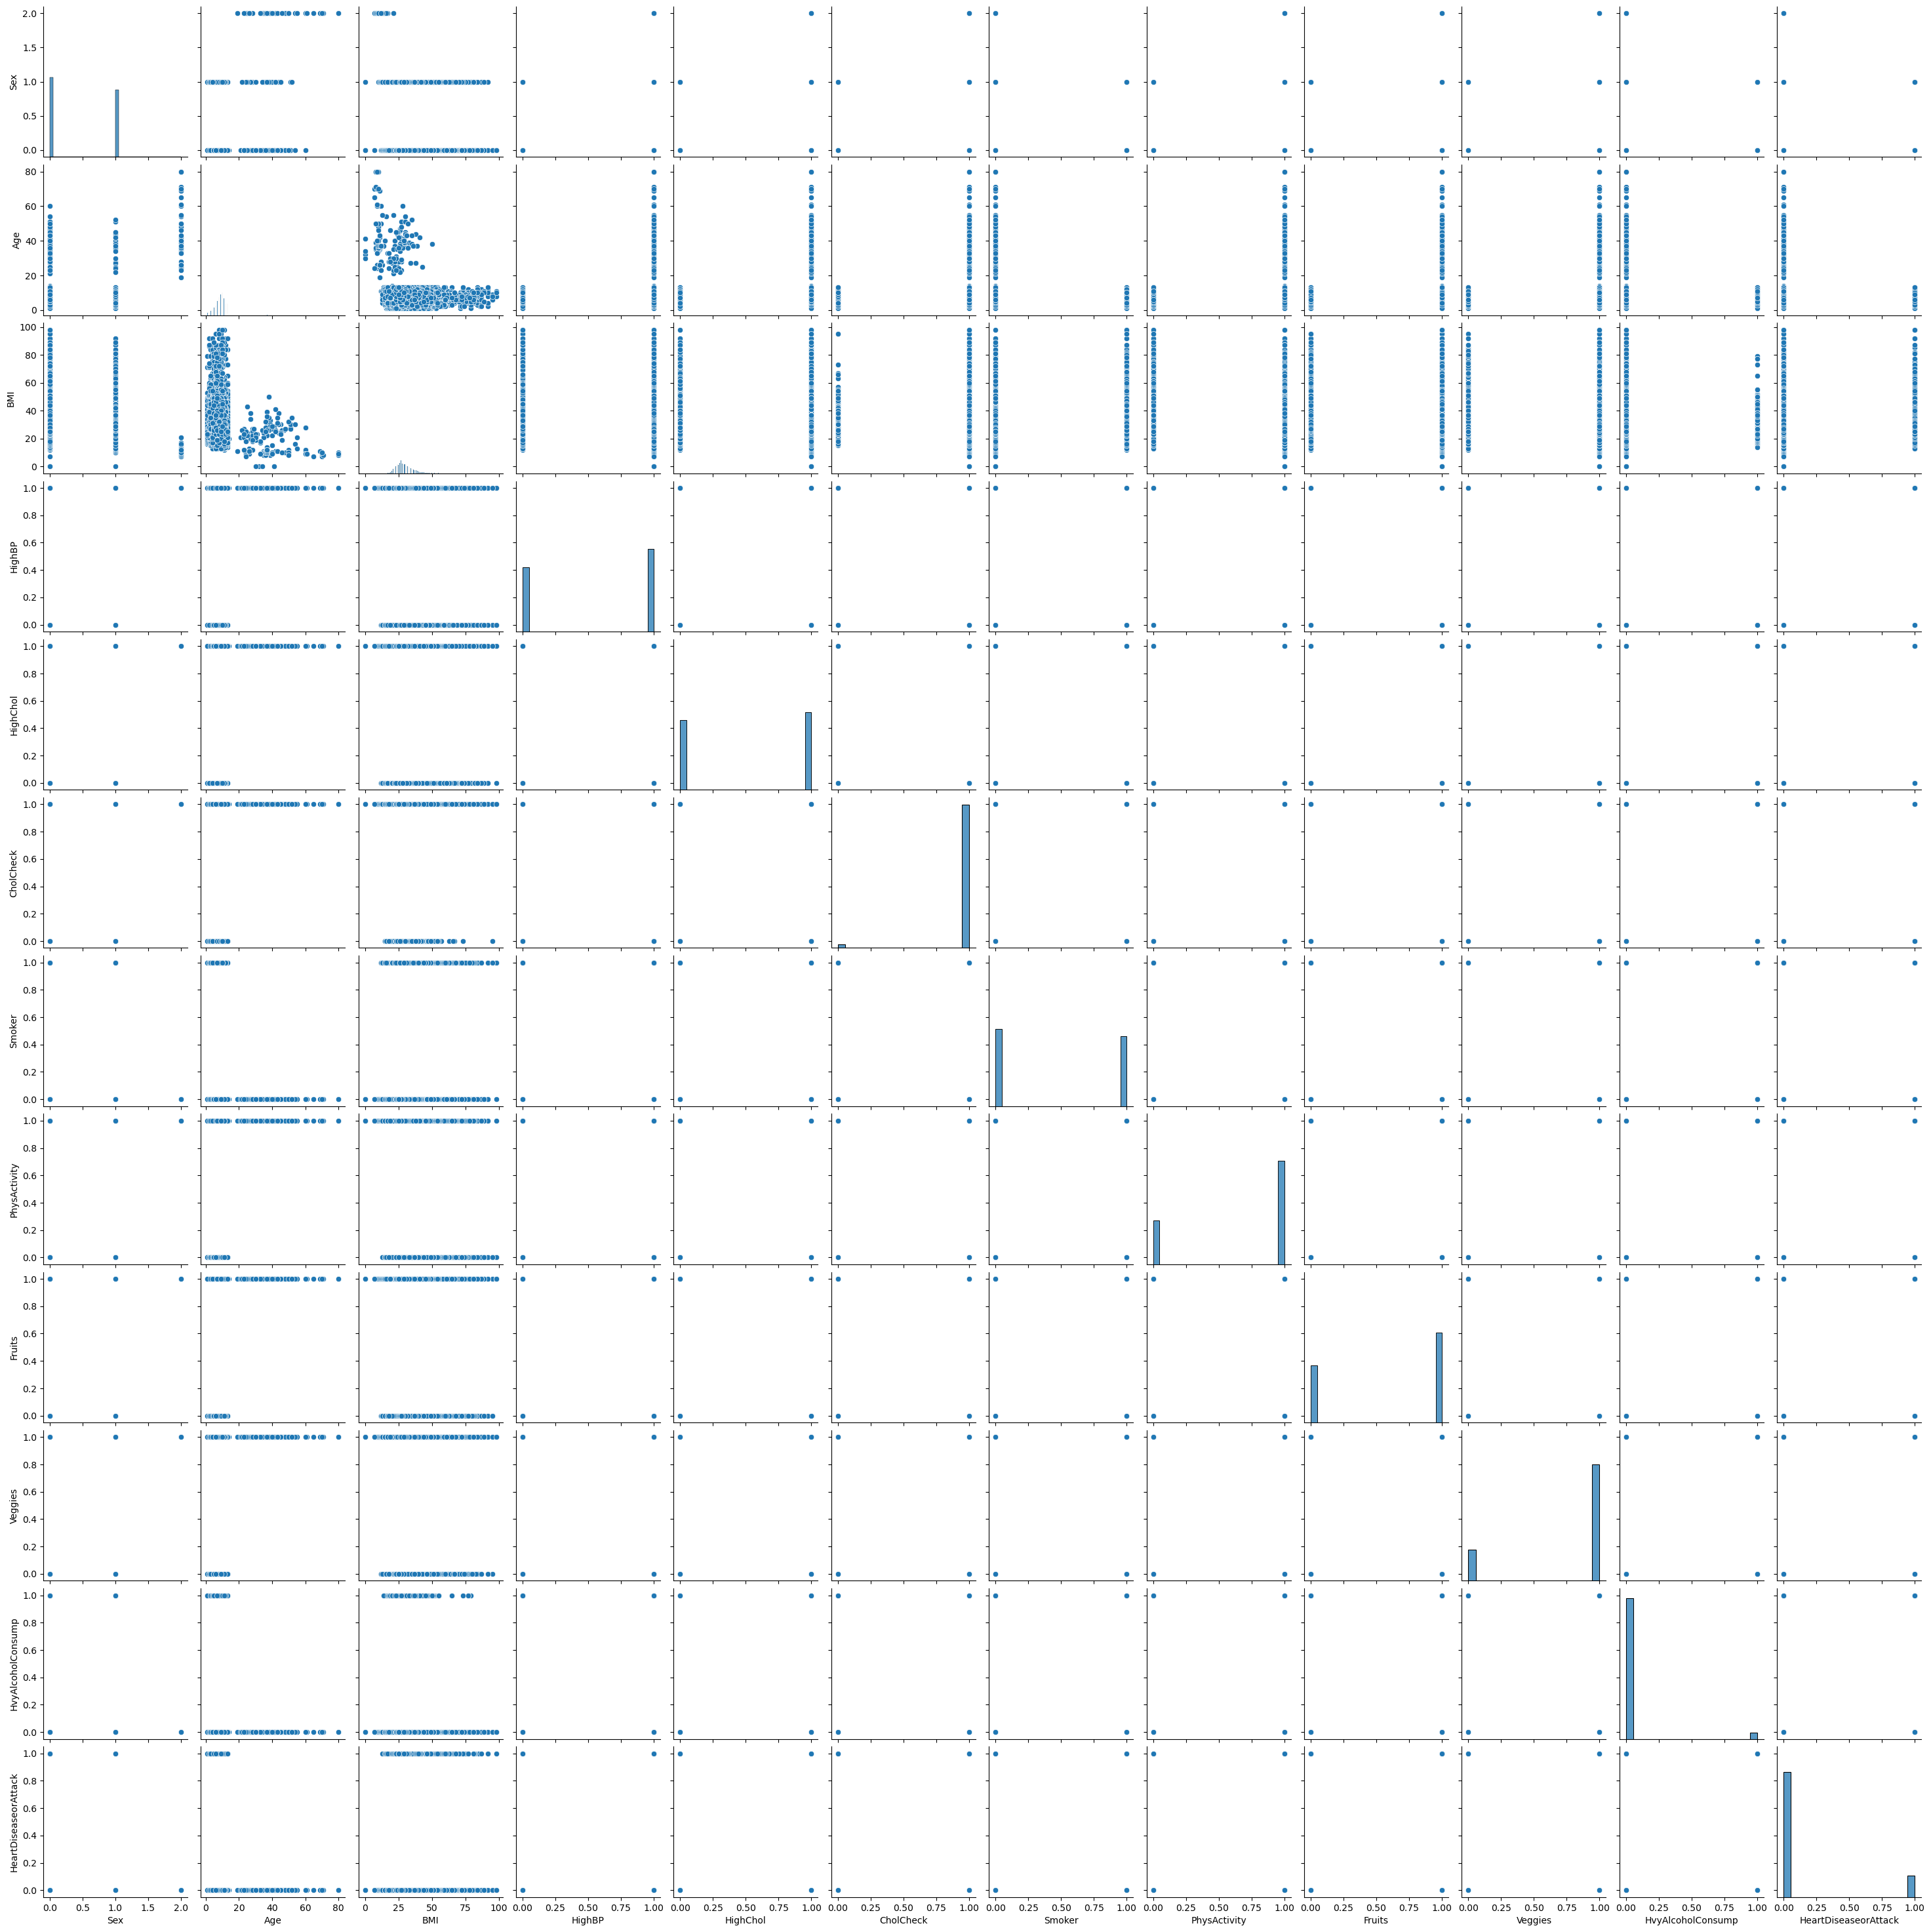

In [172]:
# Dynamically select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number').columns

# Create pair plot for numerical columns
sns.pairplot(df[numerical_columns])
plt.show()



This chartise showing the relationship between two important health factors for people with diabetes. For example, it might be looking at how a person's blood sugar levels relate to their body weight or body mass index (BMI).

What we can see is that the data points don't fall into a simple, straight line. Instead, they cluster together in different groups. This suggests the connection between blood sugar and body weight/BMI is quite complex for people with diabetes.

There may be some individuals who have very high blood sugar but a relatively low BMI - these would be the outlier points on the chart. And there could be other subgroups where the relationship between the two factors is stronger or weaker.

The key insight here is that diabetes is not a one-size-fits-all condition. Each person's physiology and how the different health factors interact can be quite unique. A simple linear relationship doesn't capture the full picture.

To really understand diabetes and develop effective treatments, we need to look at the nuances and patterns in the data, not just the overall trend. Identifying those subgroups and outliers could help us uncover important insights about the different ways diabetes manifests in differel questions.ment and care.